# Notebook for exploration of widefield imaging data 
## of cortical or skull surface during windowed grating stimulation for creation of mouse visual system electrode insertion maps
### Denman Lab, 2022

imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
import os,sys,glob, tqdm
import tifffile

set paths to imaging and visual stimulus data

In [2]:
imaging_path = '/Users/danieljdenman/Desktop/c88_20211208'
stimulus_path = glob.glob(os.path.join(imaging_path,'c*'))[0]

create pandas DataFrames from the visual stimulus data

In [3]:
df_camera_triggers = pd.read_csv(os.path.join(stimulus_path,'camera_triggers.csv'),index_col=None,header=None)
df_grating_frames  = pd.read_csv(os.path.join(stimulus_path,'grating_frames.csv'),index_col=None,header=None)
df_gratings        = pd.read_csv(os.path.join(stimulus_path,'gratings.csv'),index_col=None)

In [4]:
df_gratings.shape

(50, 3)

In [5]:
df_grating_frames.shape

(50, 5)

do some inspection of the image data to make sure we have what me might expect

In [6]:
image_list = glob.glob(os.path.join(imaging_path,'Pos0','*.tif'))
print('number of images: '+str(len(image_list)))
print('triggers per image: '+str(df_camera_triggers.shape[0] / len(image_list)))
print('images per stimulus: '+str(len(image_list)/df_grating_frames.shape[0]))
image_dims = tifffile.imread(image_list[0]).shape
print('image dimensions: '+str(image_dims))

number of images: 2934
triggers per image: 1.0102249488752557
images per stimulus: 58.68
image dimensions: (456, 684)


In [8]:
print('loading raw movie...')
raw_movie = np.zeros((image_dims[0],image_dims[1],len(image_list)))
for frame in tqdm.tqdm_notebook(range(len(image_list))):
    raw_movie[:,:,frame] = tifffile.imread(image_list[frame])

loading raw movie...


/Users/danieljdenman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/2934 [00:00<?, ?it/s]

make a quick plot of a single (randomly chose to be x=100,y=100) pixel over the movie to make sure it looks as we might expect

Text(0.5, 0, 'frame number')

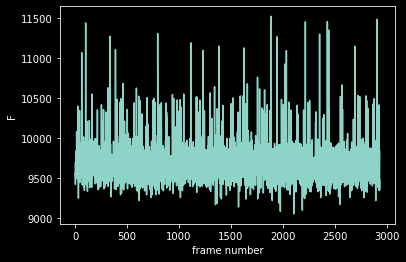

In [9]:
plt.plot(raw_movie[100,100,:])
plt.ylabel('F')
plt.xlabel('frame number')

make a quick plot of a single frame (randomly chose to be frame 200) to make sure it looks as we might expect

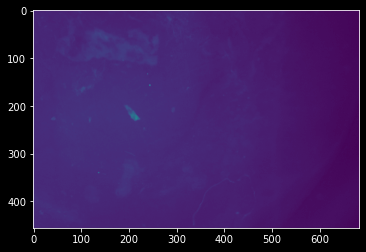

In [14]:
plt.imshow(raw_movie[:,:,200])

## calculate dF/F for each trial 
dF/F = (F-F0)/F0<br>
where F is fluourescence at a given pixel at a give time point, F0 is the fluorescence at time (aka frame) zero

In [13]:
images_per_stim = int(np.ceil(len(image_list)/df_grating_frames.shape[0]))
mean_dff = np.zeros((image_dims[0],image_dims[1],images_per_stim))
count=0
for stim in tqdm.notebook.tqdm(range(df_gratings.shape[0])):
    im_indexs = np.arange(stim*images_per_stim,stim*images_per_stim+images_per_stim)
    for im in range(images_per_stim):
        if im==0:
            baseline_image = raw_movie[:,:,count]
        image = raw_movie[:,:,count]
        mean_dff[:,:,im] = (image-baseline_image)/baseline_image
        count+=1              



  0%|          | 0/50 [00:00<?, ?it/s]

IndexError: index 2934 is out of bounds for axis 2 with size 2934

## calculate a an "average movie" triggered on each stimulus start

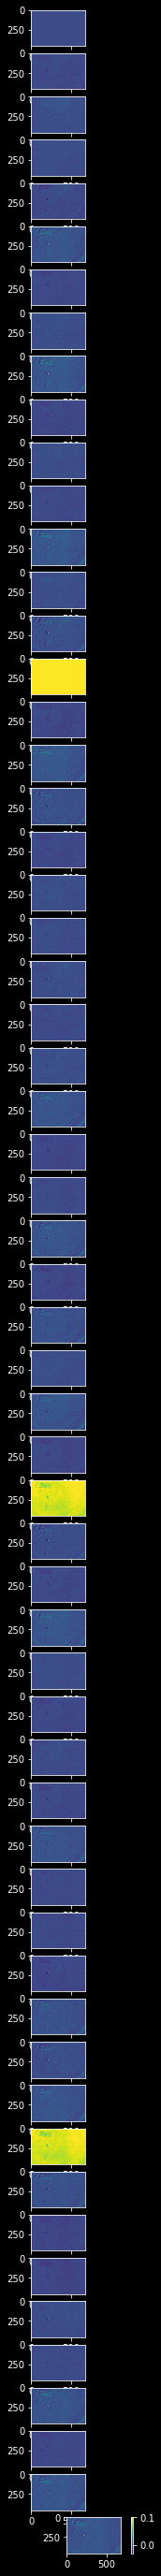

In [16]:
f,ax=plt.subplots(images_per_stim,1,figsize=(4,50))
for i in range(images_per_stim):
    f_=ax[i].imshow(mean_dff[:,:,i],clim=(-0.03,0.1))
plt.colorbar(f_)

look at a single pixel (hardcoded) throughout the mean

(-0.03, 0.1)

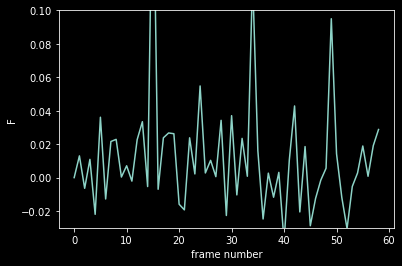

In [18]:
plt.plot(mean_dff[270,420,:])
plt.ylabel('F')
plt.xlabel('frame number')
plt.ylim(-0.03,0.1)

In [54]:
df_camera_triggers.shape[0] / len(image_list)

2.956686518678939

In [41]:
len(glob.glob(os.path.join(imaging_path,'Pos0','*'))) / 50.

36.94

In [38]:
df_camera_triggers['seconds']=[int(int(df_camera_triggers[4].iloc[i][:-1]) - int(df_camera_triggers[4].iloc[0][:-1]))/1e7 for i in range(df_camera_triggers.shape[0])]

(0.0, 1.2)

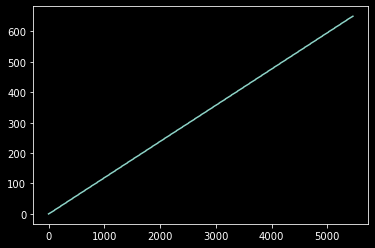

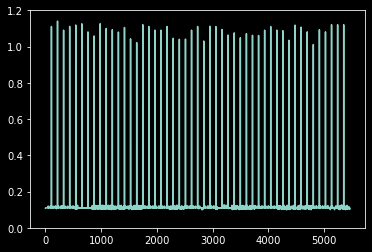

In [48]:
plt.plot(df_camera_triggers.seconds)
plt.figure()
plt.plot(np.diff(df_camera_triggers.seconds))
plt.ylim(0,1.2)

In [47]:
np.where(np.diff(df_camera_triggers.seconds) > 0.2)[0].shape

(49,)